##Project Objective
Scrape Movie dataset from IMDB, perform analysis for deeper insights and build a recommendation system.

# Importing Librarires

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df=pd.read_csv("/content/IMDB_Dataset_.csv")

# EDA - Exploratory Data Analysis

In [3]:
df.head()

,Name of movie,Year of relase,Watchtime,Genre,Certification,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Stars
0,The Shawshank Redemption,1994,142.0,Drama,R,9.3,82,"2,807,755",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,175.0,"Crime, Drama",R,9.2,100,"1,956,642",$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,Ramayana: The Legend of Prince Rama,1993,135.0,"Animation, Action, Adventure",PG,9.2,,"13,043",,An anime adaptation of the Hindu epic the Rama...,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,The Chaos Class,1975,87.0,"Comedy, Drama",,9.2,,"42,252",,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,The Dark Knight,2008,152.0,"Action, Crime, Drama",PG-13,9.0,84,"2,789,502",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of movie     10002 non-null  object 
 1   Year of relase    10002 non-null  object 
 2   Watchtime         10002 non-null  float64
 3   Genre             10002 non-null  object 
 4   Certification     10002 non-null  object 
 5   Movie Rating      10002 non-null  float64
 6   Metascore         10002 non-null  object 
 7   Votes             10002 non-null  object 
 8   Gross collection  10002 non-null  object 
 9   Description       10002 non-null  object 
 10  Director          10002 non-null  object 
 11  Stars             10002 non-null  object 
dtypes: float64(2), object(10)
memory usage: 937.8+ KB


In [5]:
df.shape

(10002, 12)

In [6]:
df.describe()

,Watchtime,Movie Rating
count,10002.000000,10002.000000
mean,110.729154,6.728134
std,22.037023,0.819563
min,45.000000,4.900000
25%,96.000000,6.100000
50%,107.000000,6.700000
75%,121.000000,7.300000
max,439.000000,9.300000


In [7]:
df.isnull()   #checking is there any missing values are there in data or not

,Name of movie,Year of relase,Watchtime,Genre,Certification,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Stars
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False
9999,False,False,False,False,False,False,False,False,False,False,False,False
10000,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Columns
df.columns

Index(['Name of movie', 'Year of relase', 'Watchtime', 'Genre',
       'Certification', 'Movie Rating', 'Metascore', 'Votes',
       'Gross collection', 'Description', 'Director', 'Stars'],
      dtype='object')

In [9]:
#Unique values
df.nunique()

Name of movie       9632
Year of relase       191
Watchtime            171
Genre                427
Certification         25
Movie Rating          44
Metascore             94
Votes               9304
Gross collection    4175
Description         9998
Director            4158
Stars               9949
dtype: int64

In [10]:
df.isnull().sum()

Name of movie       0
Year of relase      0
Watchtime           0
Genre               0
Certification       0
Movie Rating        0
Metascore           0
Votes               0
Gross collection    0
Description         0
Director            0
Stars               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.head(10)

,Name of movie,Year of relase,Watchtime,Genre,Certification,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Stars
0,The Shawshank Redemption,1994,142.0,Drama,R,9.3,82,"2,807,755",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,175.0,"Crime, Drama",R,9.2,100,"1,956,642",$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,Ramayana: The Legend of Prince Rama,1993,135.0,"Animation, Action, Adventure",PG,9.2,,"13,043",,An anime adaptation of the Hindu epic the Rama...,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,The Chaos Class,1975,87.0,"Comedy, Drama",,9.2,,"42,252",,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,The Dark Knight,2008,152.0,"Action, Crime, Drama",PG-13,9.0,84,"2,789,502",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
5,Schindler's List,1993,195.0,"Biography, Drama, History",R,9.0,95,"1,411,485",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
6,The Lord of the Rings: The Return of the King,2003,201.0,"Action, Adventure, Drama",PG-13,9.0,94,"1,921,973",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
7,12 Angry Men,1957,96.0,"Crime, Drama",Approved,9.0,97,"835,696",$4.36M,The jury in a New York City murder trial is fr...,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."
8,The Godfather Part II,1974,202.0,"Crime, Drama",R,9.0,90,"1,328,667",$57.30M,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
9,Mirror Game,2016,147.0,"Crime, Mystery, Thriller",,9.0,,"29,125",,A struggling actor becomes a professional impo...,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part..."


In [13]:
df.tail(10)

,Name of movie,Year of relase,Watchtime,Genre,Certification,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Stars
9992,The Vault,I 2017,91.0,"Crime, Horror, Mystery",Not Rated,4.9,50,"13,458",$0.01M,Two estranged sisters are forced to rob a bank...,Dan Bush,"James Franco, Scott Haze, Taryn Manning, Franc..."
9993,Kickboxer: Vengeance,2016,90.0,"Action, Crime, Drama",Not Rated,4.9,37,"11,948",,A kick boxer is out to avenge his brother.,John Stockwell,"Dave Bautista, Alain Moussi, Gina Carano, Jean..."
9994,Turbulence,1997,100.0,"Action, Thriller",R,4.9,,"12,414",$11.47M,After a shootout on a flight transporting pris...,Robert Butler,"Ray Liotta, Lauren Holly, Brendan Gleeson, Hec..."
9995,Happy New Year,I 2014,180.0,"Action, Comedy, Crime",Not Rated,4.9,,"39,683",,A gang of amateur dancers takes part in a danc...,Farah Khan,"Shah Rukh Khan, Deepika Padukone, Abhishek Bac..."
9996,Holy Man,1998,114.0,"Comedy, Drama",PG,4.9,41,"20,672",$12.07M,Eddie Murphy stars as an over-the-top televisi...,Stephen Herek,"Eddie Murphy, Jeff Goldblum, Kelly Preston, Ro..."
9997,Ong Bak 3,2010,99.0,Action,R,4.9,38,"14,480",$0.01M,"Continuing from Ong Bak 2's 1440s, Prince Tien...","Tony Jaa, Panna Rittikrai","Tony Jaa, Dan Chupong, Sarunyu Wongkrachang, P..."
9998,The Big Bounce,2004,88.0,"Comedy, Crime",PG-13,4.9,42,"18,643",$6.47M,A small-time con artist and a Hawaiian real es...,George Armitage,"Owen Wilson, Morgan Freeman, Gary Sinise, Sara..."
9999,Madea's Witness Protection,2012,114.0,"Comedy, Crime, Drama",PG-13,4.9,42,"11,214",$65.65M,A Wall Street investment banker who has been s...,Tyler Perry,"Tyler Perry, Eugene Levy, Denise Richards, Tom..."
10000,Rise: Blood Hunter,2007,97.0,"Action, Crime, Horror",R,4.9,,"12,405",$0.11M,A reporter wakes up in a morgue and finds hers...,Sebastian Gutierrez,"Lucy Liu, Michael Chiklis, Carla Gugino, Rober..."
10001,Le divorce,2003,117.0,"Comedy, Drama, Romance",PG-13,4.9,51,"11,903",$9.07M,French vs. American social customs and behavio...,James Ivory,"Kate Hudson, Naomi Watts, Stockard Channing, J..."


In [14]:
df.corr()

,Watchtime,Movie Rating
Watchtime,1.000000,0.341018
Movie Rating,0.341018,1.000000


In [15]:
df.dtypes

Name of movie        object
Year of relase       object
Watchtime           float64
Genre                object
Certification        object
Movie Rating        float64
Metascore            object
Votes                object
Gross collection     object
Description          object
Director             object
Stars                object
dtype: object

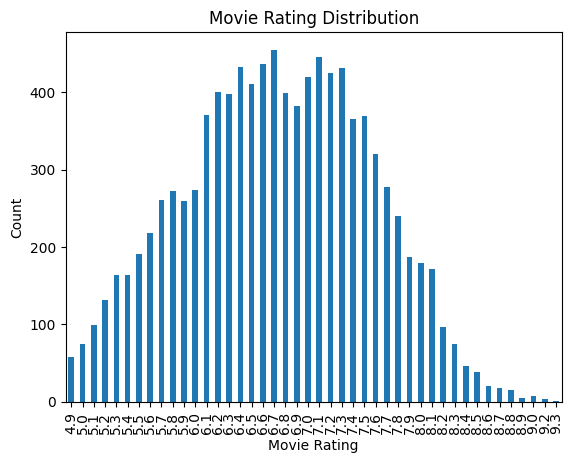

In [16]:
df['Movie Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Movie Rating Distribution')
plt.show()

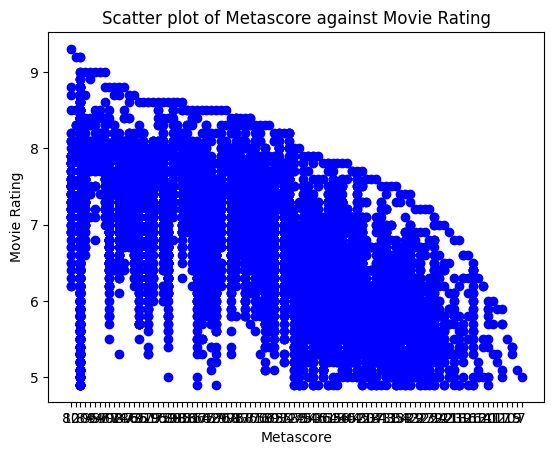

In [17]:
plt.scatter(df.Metascore,df['Movie Rating'], color='b')
plt.xlabel('Metascore')
plt.ylabel('Movie Rating')
plt.title('Scatter plot of Metascore against Movie Rating')
plt.show()

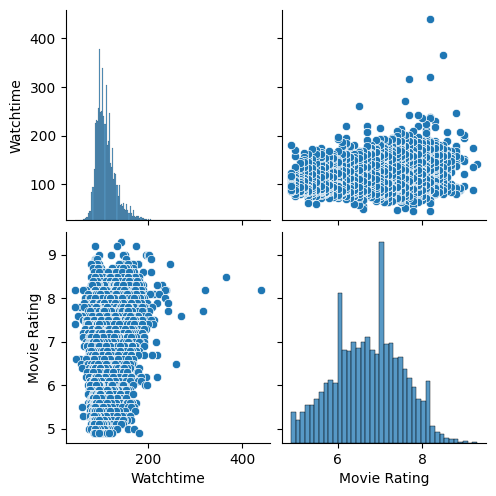

In [18]:
sns.pairplot(df)
plt.show()

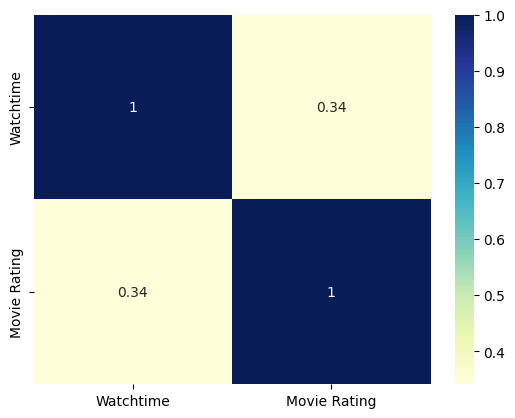

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

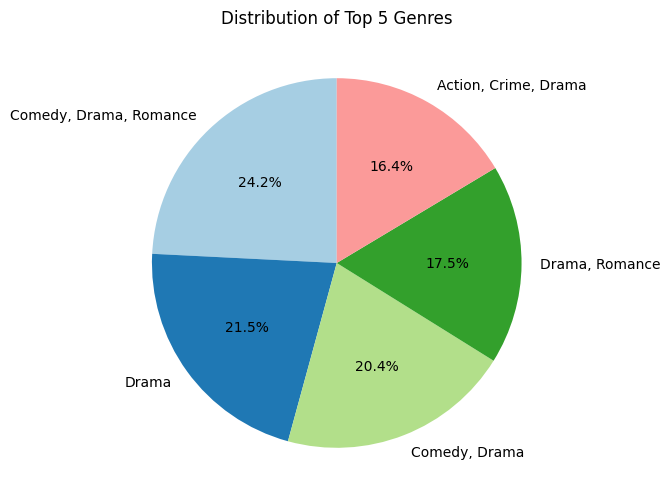

In [20]:
#Top 5 Genres of dataset
genre_counts = df['Genre'].value_counts().nlargest(5)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Top 5 Genres')
plt.show()

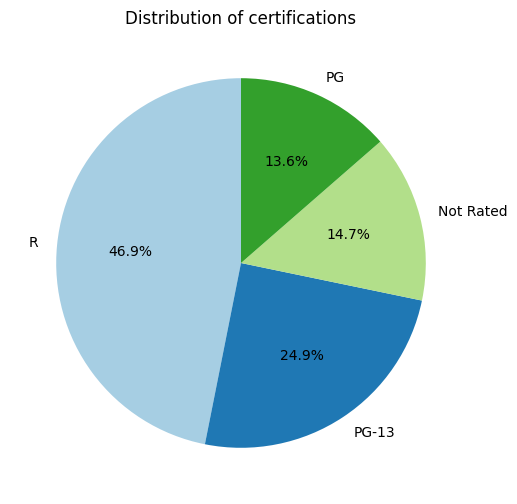

In [21]:
certificate_counts = df['Certification'].value_counts().nlargest(4)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of certifications')
plt.show()

In [22]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('Movies.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Movies.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Building

In [23]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# some important packages
import os
import re

# scikit-learn

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [24]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model1 = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [25]:
def embed(texts):
    return model1(texts)

In [26]:
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549279,  0.02886906, -0.02628897,  0.04502158, -0.01233335,
         0.02568329, -0.00071882, -0.05447304,  0.04221928, -0.0191371 ,
         0.02710011, -0.04328045, -0.02486858,  0.0135952 ,  0.00482793,
        -0.05379638,  0.01630707,  0.02139907,  0.02644024, -0.02320251,
         0.06569218, -0.10137626, -0.01691998,  0.02492482,  0.02406815,
        -0.03139618, -0.03265484, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868447,  0.04380691, -0.02071748, -0.01873296, -0.03071439,
         0.01825575,  0.03627162,  0.01321464,  0.0094349 , -0.03006625,
         0.06655685,  0.01529936, -0.10101432, -0.00671943, -0.01578641,
         0.04991001,  0.02548564,  0.05454975, -0.01658573,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997448,
         0.04206816, -0.04119828, -0.00768586, -0.05101158,  0.01210047,
        -0.01673209, -0.01382073,  0.00373702,  0.04911597, -0.03481682,
 

In [27]:
df = pd.read_csv("/content/IMDB_Dataset_.csv", engine="python")
df.head()

,Name of movie,Year of relase,Watchtime,Genre,Certification,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Stars
0,The Shawshank Redemption,1994,142.0,Drama,R,9.3,82,"2,807,755",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,175.0,"Crime, Drama",R,9.2,100,"1,956,642",$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,Ramayana: The Legend of Prince Rama,1993,135.0,"Animation, Action, Adventure",PG,9.2,,"13,043",,An anime adaptation of the Hindu epic the Rama...,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,The Chaos Class,1975,87.0,"Comedy, Drama",,9.2,,"42,252",,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,The Dark Knight,2008,152.0,"Action, Crime, Drama",PG-13,9.0,84,"2,789,502",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."


In [28]:
df = df[["Name of movie", "Description"]]
df.head()


,Name of movie,Description
0,The Shawshank Redemption,"Over the course of several years, two convicts..."
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama,An anime adaptation of the Hindu epic the Rama...
3,The Chaos Class,"Lazy, uneducated students share a very close b..."
4,The Dark Knight,When the menace known as the Joker wreaks havo...


In [29]:
titles = list(df['Description'])
titles1 = list(df['Name of movie'])

In [30]:
titles[:5]

['Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.',
 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.',
 'An anime adaptation of the Hindu epic the Ramayana, where Lord Ram combats the wicked king Ravana.',
 'Lazy, uneducated students share a very close bond. They live together in the dormitory, where they plan their latest pranks. When a new headmaster arrives, the students naturally try to overthrow him. A comic war of nitwits follows.',
 'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.']

In [31]:
embeddings = embed(titles)
embeddings1 = embed(titles1)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (10002, 512)


In [32]:
pca = PCA(n_components=2)
pca.fit(embeddings)
emb_2d = pca.fit_transform(embeddings)


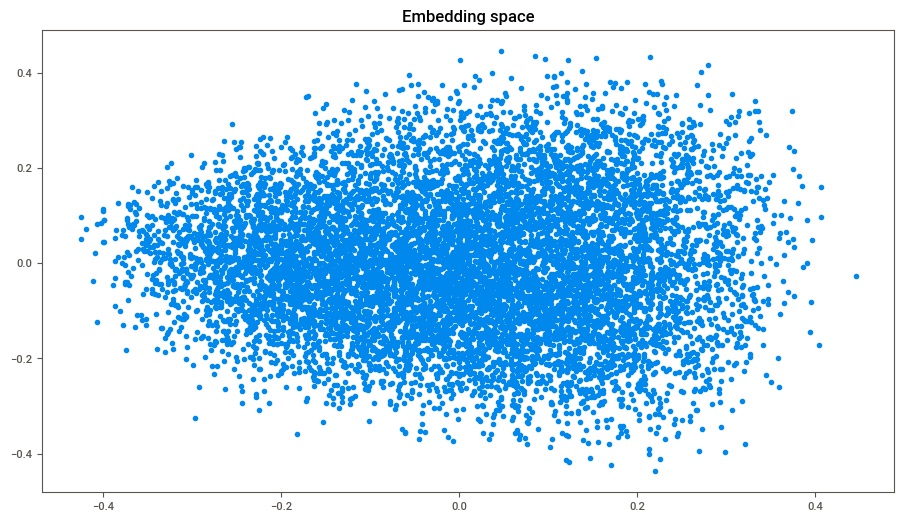

In [33]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [34]:
nn = NearestNeighbors(n_neighbors=15)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=15)

In [35]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['Name of movie'].iloc[neighbors].tolist()


In [36]:
print('Recommended Movies:')
Rec=recommend("The Godfather")

Recommended Movies:


In [37]:
Rec

['Mafia!',
 'The Godfather',
 'The Traitor',
 'The Godfather Part II',
 'Antim: The Final Truth',
 'The Many Saints of Newark',
 'A Bronx Tale',
 'Bugsy Malone',
 'Kumbalangi Nights',
 'Romeo Is Bleeding',
 'The Freshman',
 'Confessions of a Dangerous Mind',
 'Pulp Fiction',
 'American Me',
 'Suicide Kings']

In [38]:
import pickle
pickle.dump(df, open("Name of movie.pkl", "wb"))
pickle.dump(embeddings, open("embeddings.pkl", "wb"))
pickle.dump(embeddings1, open("embeddings1.pkl", "wb"))

In [39]:
def recommend1(movie):
    l=[]
    index1=df[df['Name of movie'] == movie].index[0]
    k = np.array(embeddings1[index1]).tolist()
    l.append(k)

    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(embeddings)
    neighbors = nn.kneighbors(l, return_distance=False)[0]
    ki1= df['Name of movie'].iloc[neighbors].tolist()
    return ki1

In [40]:
recommend1('Iron Man')

['Captain America: Civil War',
 'Iron Man 2',
 'Avengers: Age of Ultron',
 'Iron Man',
 'Ant-Man and the Wasp',
 'Spider-Man: Far from Home',
 'Captain America: The Winter Soldier',
 'Captain America: The First Avenger',
 'Avengers: Endgame',
 'Kick-Ass']

In [41]:
def recommend(movie):
    l=[]

    index1=movies[movies['Name of movie'] == movie].index[0]
    k = np.array(embeddings1[index1]).tolist()
    l.append(k)
    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(embeddings1)
    neighbors = nn.kneighbors(l, return_distance=False)[0]
    ki1= movies['Name of movie'].iloc[neighbors].tolist()
    return ki1

In [42]:
df1 = pd.read_csv("Link.csv", engine="python")
df1.head()

,Name of movie,Link
0,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...
1,The Godfather,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,Ramayana: The Legend of Prince Rama,https://m.media-amazon.com/images/M/MV5BNTJjZT...
3,Hababam Sinifi,https://m.media-amazon.com/images/M/MV5BMGRjOG...
4,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...


In [43]:
kf=df1['Link']
kf

0        https://m.media-amazon.com/images/M/MV5BNDE3OD...
1        https://m.media-amazon.com/images/M/MV5BM2MyNj...
2        https://m.media-amazon.com/images/M/MV5BNTJjZT...
3        https://m.media-amazon.com/images/M/MV5BMGRjOG...
4        https://m.media-amazon.com/images/M/MV5BMTMxNT...
                               ...                        
10000    https://m.media-amazon.com/images/M/MV5BZThhM2...
10001    https://m.media-amazon.com/images/M/MV5BM2QxMW...
10002    https://m.media-amazon.com/images/M/MV5BMTUyND...
10003    https://m.media-amazon.com/images/M/MV5BMjUzMD...
10004    https://m.media-amazon.com/images/M/MV5BOWU5MD...
Name: Link, Length: 10005, dtype: object

In [44]:
import pickle
pickle.dump(df1, open("Link.pkl", "wb"))

In [45]:
li=[]
k=df1[df1['Name of movie']=='The Godfather']['Link']
li=k.tolist()
li[0]


'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg'

In [46]:
%%writefile kk1.py
import pickle
import numpy as np
import streamlit as st
import requests
from sklearn.neighbors import NearestNeighbors
st.set_page_config(layout="wide")
def recommend(movie):
    l=[]
    index1=movies[movies['Name of movie'] == movie].index[0]
    k = np.array(embeddings1[index1]).tolist()
    l.append(k)
    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(embeddings)
    neighbors = nn.kneighbors(l, return_distance=False)[0]
    ki1= movies['Name of movie'].iloc[neighbors].tolist()
    return ki1

st.header('Movie Recommender System')
movies = pickle.load(open('Name of movie.pkl','rb'))
embeddings= pickle.load(open('embeddings.pkl','rb'))
embeddings1= pickle.load(open('embeddings1.pkl','rb'))
Link= pickle.load(open('Link.pkl','rb'))
movie_list = movies['Name of movie'].values
selected_movie = st.selectbox(
    "Type or select a movie from the dropdown",
    movie_list
)

def img(value):
    lis1=[]
    lis=Link[Link['Name of movie']==value]['Link']
    lis1=lis.tolist()
    return lis1[0]


if st.button('Show Recommendation'):
    ki = recommend(selected_movie)
    col1, col2, col3, col4, col5,col6, col7, col8, col9, col10 = st.columns(10)
    with col1:
        st.image(img(ki[0]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[0]}**")
    with col2:

        st.image(img(ki[1]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[1]}**")
    with col3:
        st.image(img(ki[2]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[2]}**")

    with col4:
        st.image(img(ki[3]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[3]}**")

    with col5:
        st.image(img(ki[4]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[4]}**")
    with col6:
        st.image(img(ki[5]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[5]}**")
    with col7:

        st.image(img(ki[6]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[6]}**")
    with col8:
        st.image(img(ki[7]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[7]}**")

    with col9:
        st.image(img(ki[8]), width=120, use_column_width=100, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[8]}**")

    with col10:
        st.image(img(ki[9]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[9]}**")








Overwriting kk1.py


##Deployment Link
https://group-3-5ivw9dndb4y4zhbbcpoubk.streamlit.app/